In [175]:
import pandas as pd

In [176]:
df = pd.read_csv(r"C:\Users\Shailesh\OneDrive\Desktop\coding\Python\Machine Learning\M_0_Assignment\Housing.csv")
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [177]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [178]:
df.duplicated().sum()

0

In [179]:
df.shape

(545, 13)

In [180]:
df.drop_duplicates()
df.dropna()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [181]:
df.shape

(545, 13)

In [182]:
from sklearn.model_selection import train_test_split

x = df[["area","bedrooms","bathrooms","stories","mainroad","guestroom","basement","hotwaterheating","airconditioning","parking","prefarea","furnishingstatus"]]
y = df[["price"]]

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [183]:
col_cat = ["mainroad","guestroom","basement","hotwaterheating","airconditioning","prefarea"]
mapping = {"yes" : 1 , "no" : 0}

for col in col_cat:
    x_train[col] = x_train[col].str.strip().str.lower().map(mapping)
    x_test[col] = x_test[col].str.strip().str.lower().map(mapping)

In [184]:
from sklearn.preprocessing import OrdinalEncoder

# categories manually specify केल्या आहेत (ज्याचा क्रम आहे)
oe = OrdinalEncoder(categories=[["unfurnished", "semi-furnished", "furnished"]])

# 2D input म्हणून fit/transform
oe.fit(x_train[["furnishingstatus"]])  # double square brackets !!
x_train["furnishingstatus"] = oe.transform(x_train[["furnishingstatus"]])
x_test["furnishingstatus"] = oe.transform(x_test[["furnishingstatus"]])

In [185]:

# Step 2: x_train आणि y_train एकत्र करून df बनवा (outlier काढण्यासाठी)
train_df = pd.concat([x_train, y_train], axis=1)

# Step 3: Outlier काढा (उदा: price वरून)
q1 = train_df["price"].quantile(0.25)
q3 = train_df["price"].quantile(0.75)
iqr = q3 - q1

lower = q1 - 1.5*iqr
upper = q3 + 1.5*iqr

train_df = train_df[(train_df["price"] >= lower) & (train_df["price"] <= upper)]

# Step 4: पुन्हा x_train, y_train split करा
x_train = train_df.drop("price", axis=1)
y_train = train_df["price"]


In [186]:
df.sample(10)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
54,7350000,6000,3,2,2,yes,yes,no,no,yes,1,no,semi-furnished
445,3150000,3450,1,1,1,yes,no,no,no,no,0,no,furnished
90,6440000,5000,3,1,2,yes,no,no,no,yes,0,no,semi-furnished
154,5530000,3650,3,2,2,yes,no,no,no,no,2,no,semi-furnished
304,4193000,8250,3,1,1,yes,no,yes,no,no,3,no,semi-furnished
440,3234000,3640,4,1,2,yes,no,yes,no,no,0,no,unfurnished
120,5950000,6540,3,1,1,yes,yes,yes,no,no,2,yes,furnished
181,5215000,7200,3,1,2,yes,yes,yes,no,no,1,yes,furnished
492,2800000,2650,3,1,2,yes,no,yes,no,no,1,no,unfurnished
97,6300000,6400,3,1,1,yes,yes,yes,no,yes,1,yes,semi-furnished


In [187]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

lr = LinearRegression()

lr.fit(x_train,y_train)

y_pred = lr.predict(x_test)

In [188]:
print("MSE:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test,y_pred))   # Accuracy of regression

MSE: 1922754514205.7085
R² Score: 0.6196007928487168


In [189]:
from sklearn.model_selection import cross_val_score
import numpy as np

lr = LinearRegression()
np.mean(cross_val_score(lr,x_train,y_train,scoring="r2"))

0.6507563960793284

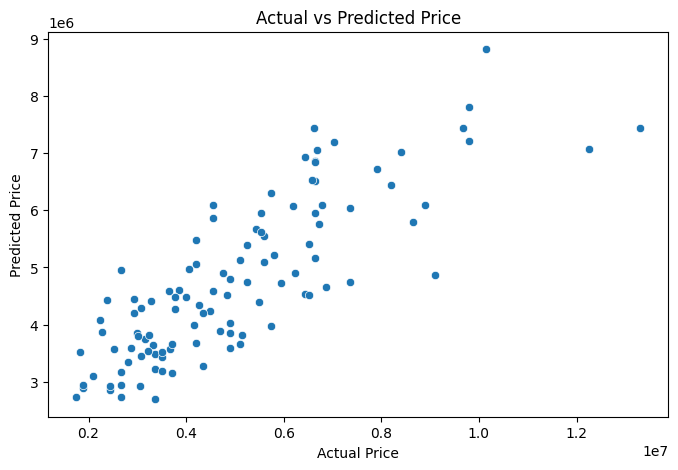

In [190]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.scatterplot(x=y_test.values.ravel(), y=y_pred.ravel())
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Price")
plt.show()


In [191]:
# new_data = [[7420, 4, 2, 3, 1, 0, 1, 0, 1, 2, 0, 2]]  # sample encoded input
# price = lr.predict(new_data)

# print("Predicted Price:", price[0])


In [192]:
print("Coefficients:", lr.coef_)       # प्रत्येक feature चा effect
print("Intercept:", lr.intercept_)     # constant 'b' in y = mx + b

AttributeError: 'LinearRegression' object has no attribute 'coef_'

# Mathematical Transformation

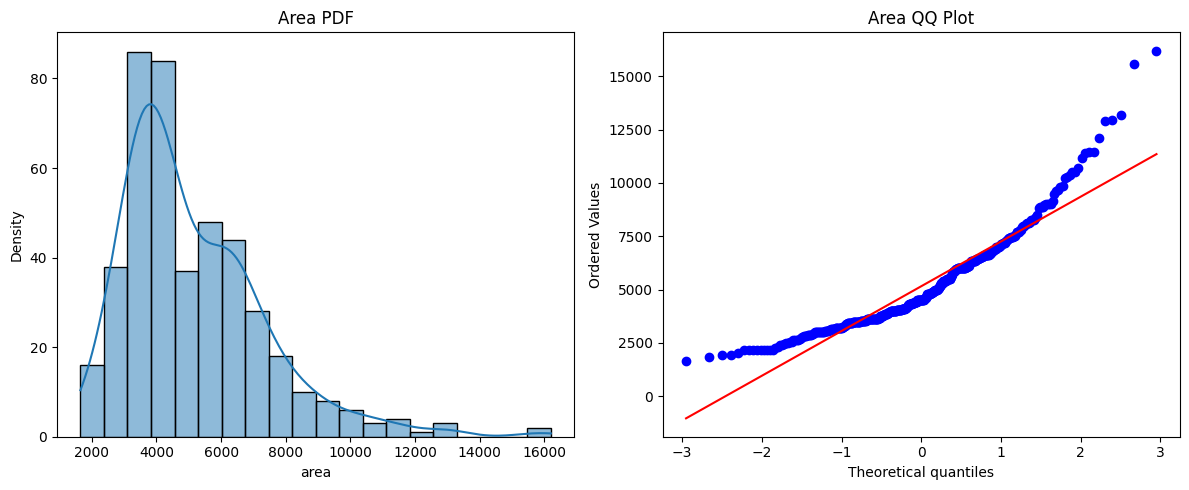

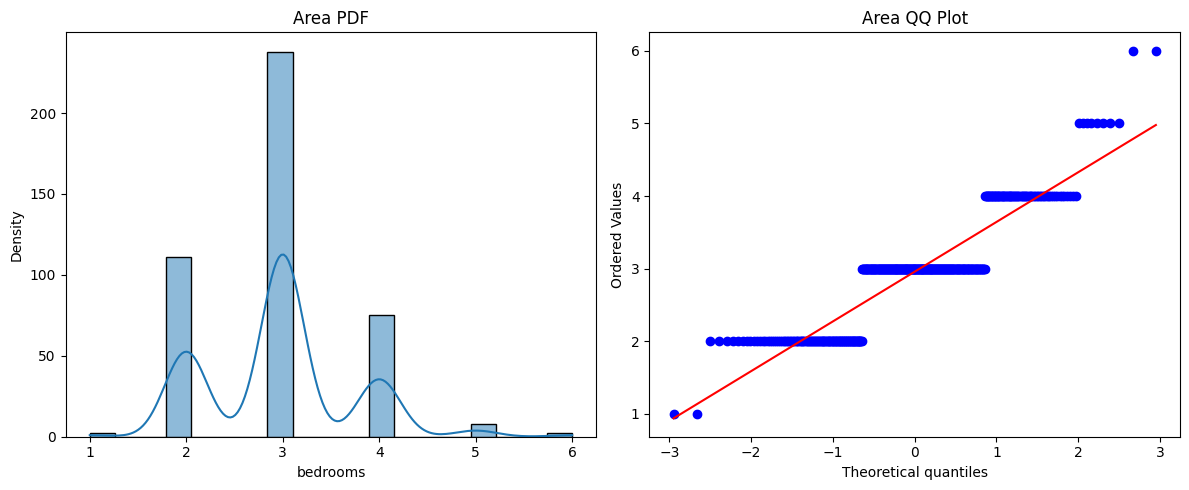

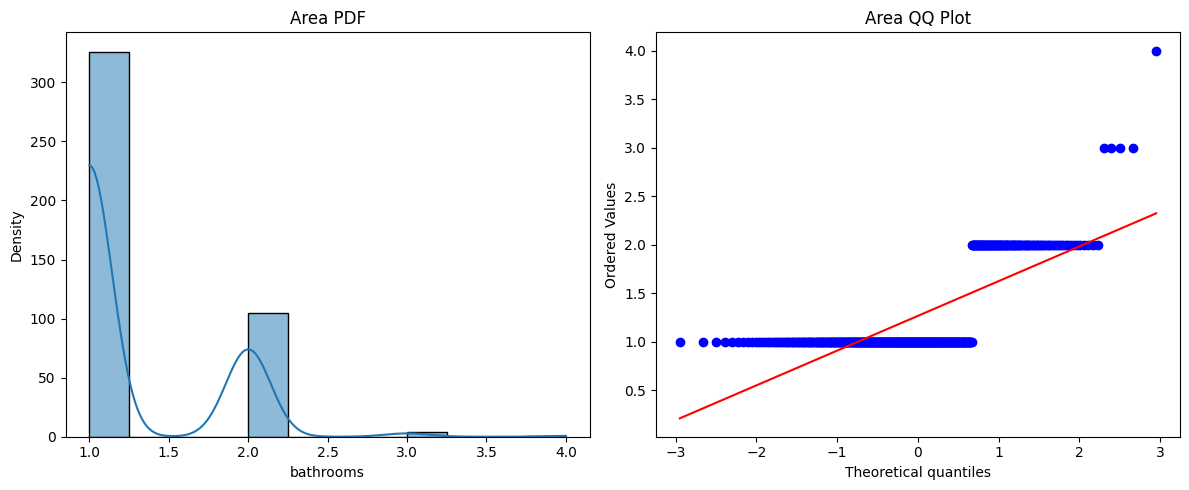

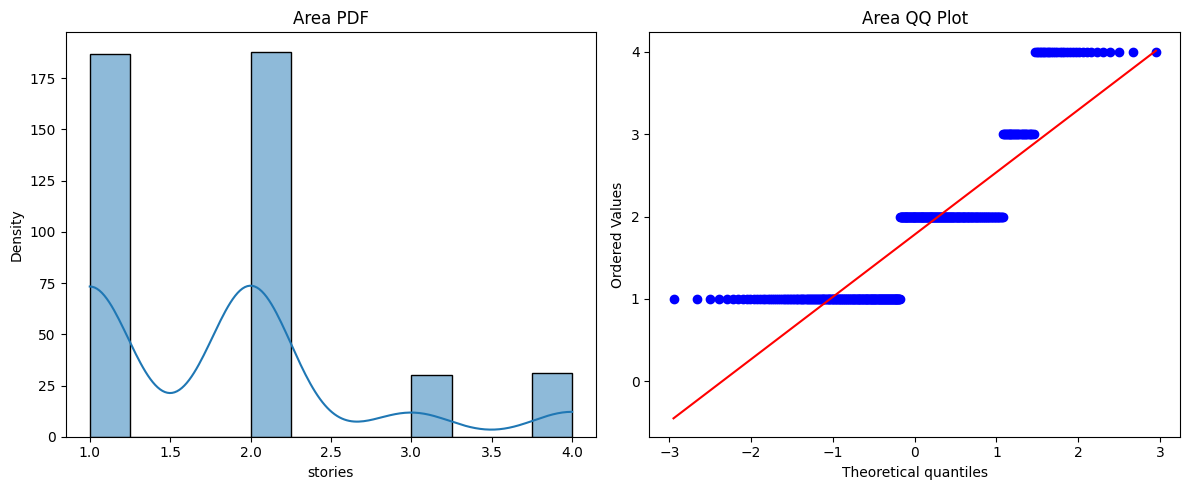

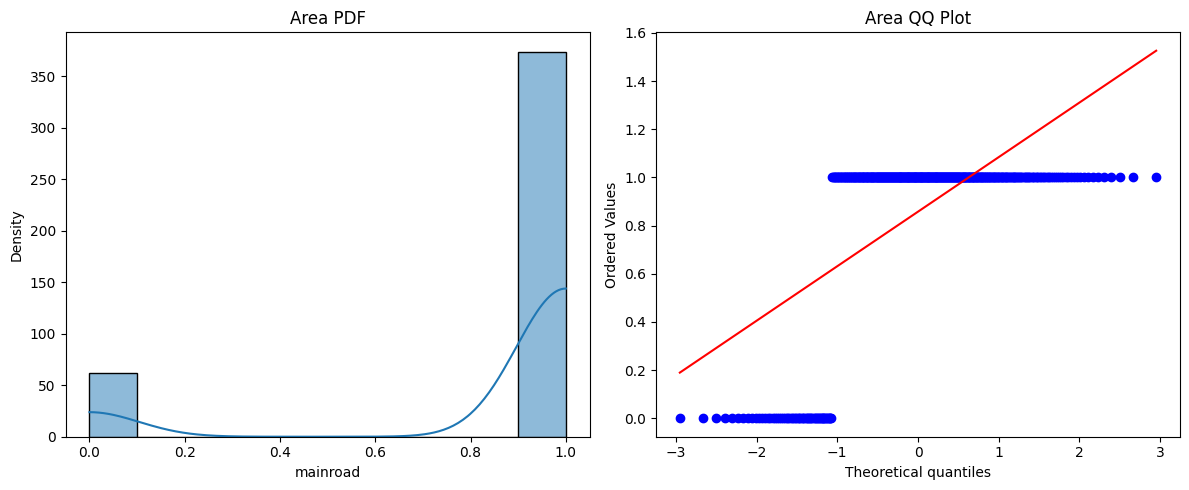

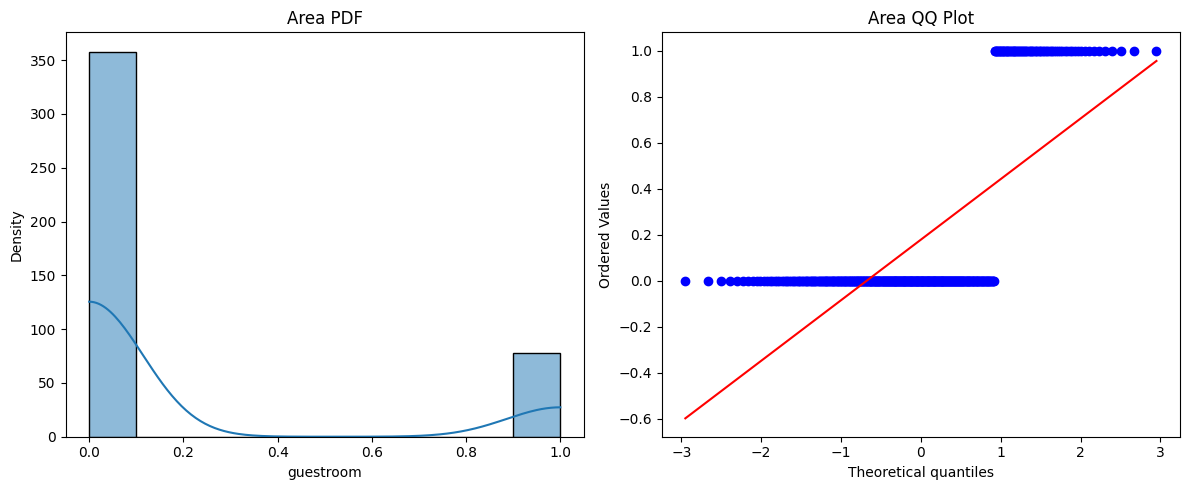

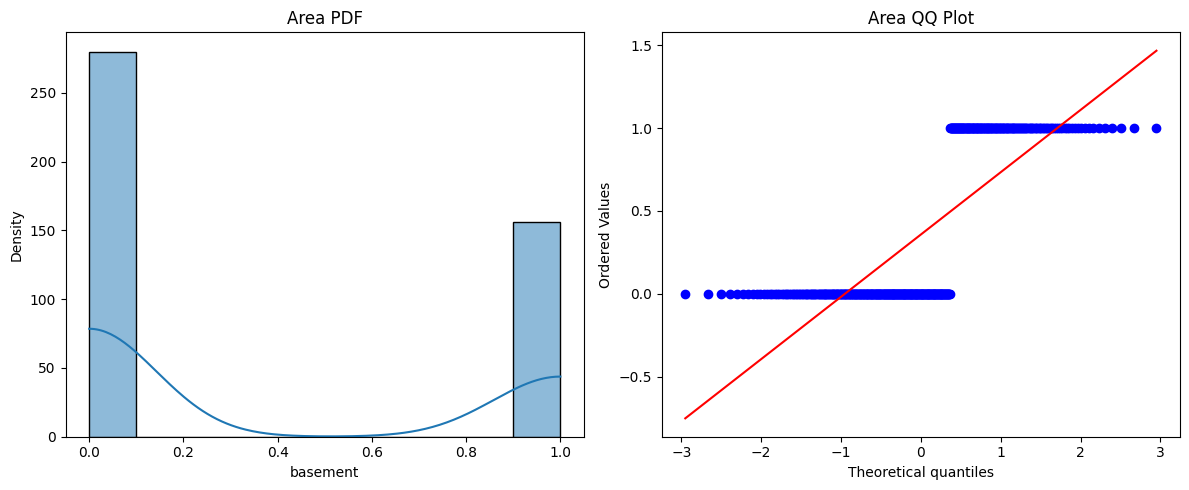

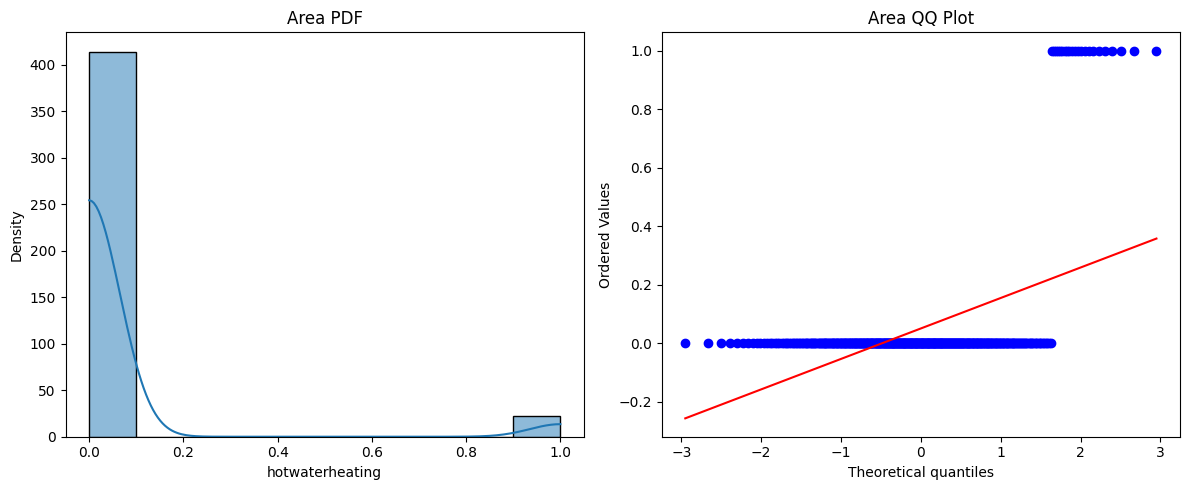

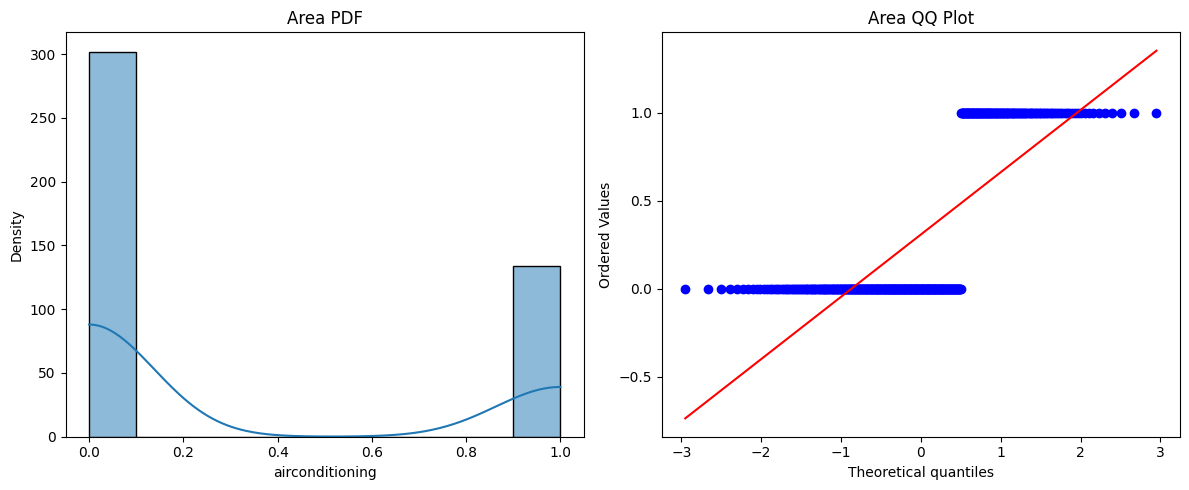

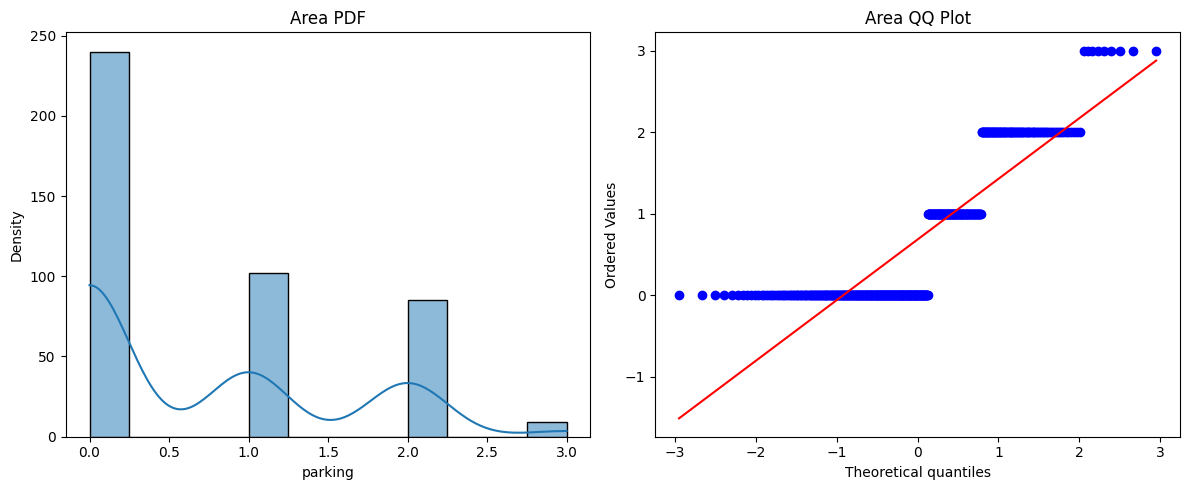

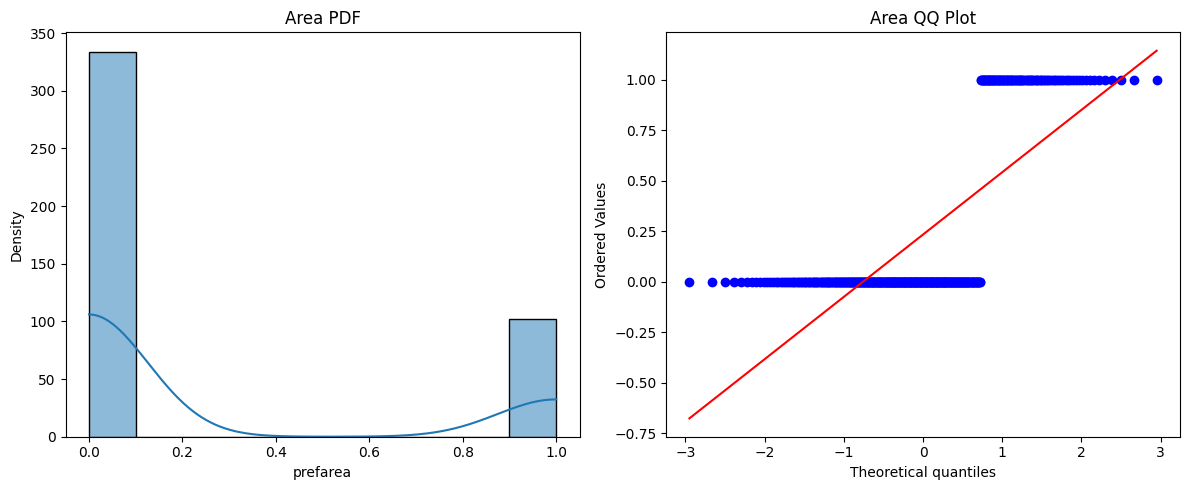

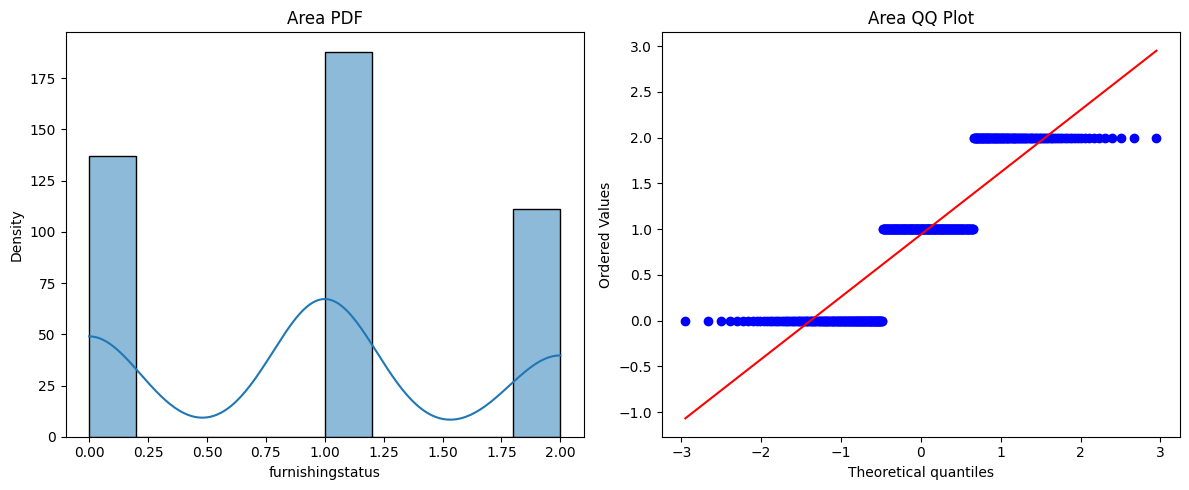

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Create the figure and axes using subplots (2 columns, 1 row)

for col in x_train.columns:
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))  # <- Set figure size for clarity

# PDF / Histogram with KDE
    sns.histplot(x_train[col], kde=True, ax=ax1)  # use histplot instead of deprecated distplot
    ax1.set_title('Area PDF')
    ax1.set_xlabel(col)
    ax1.set_ylabel('Density')

# QQ Plot
    stats.probplot(x_train[col], dist="norm", plot=ax2)
    ax2.set_title('Area QQ Plot')  # renamed to match col instead of 'Age'

    plt.tight_layout()
    plt.show()


In [ ]:
import scipy.stats as stats
from sklearn.preprocessing import PowerTransformer

In [ ]:
yeo_transofomr =  PowerTransformer(method="yeo-johnson")
x_train_transformed = yeo_transofomr.fit_transform(x_train)

[[ 0.65311605  0.16637698  1.79901668 ...  0.86108722 -0.53735817
   1.34233861]
 [ 1.09094055  0.16637698  1.79901668 ...  1.62209389 -0.53735817
   0.18809566]
 [-0.50256629 -1.3490356  -0.55555251 ...  1.3793949  -0.53735817
   1.34233861]
 ...
 [-0.06980802  0.16637698  1.79901668 ...  0.86108722 -0.53735817
   1.34233861]
 [-0.35128544 -1.3490356  -0.55555251 ... -0.86955414 -0.53735817
  -1.30040856]
 [ 0.43867806  0.16637698  1.79901668 ...  0.86108722 -0.53735817
   0.18809566]]


In [ ]:
x_train_transformed_dataframe = pd.DataFrame(x_train_transformed, columns=x_train.columns)

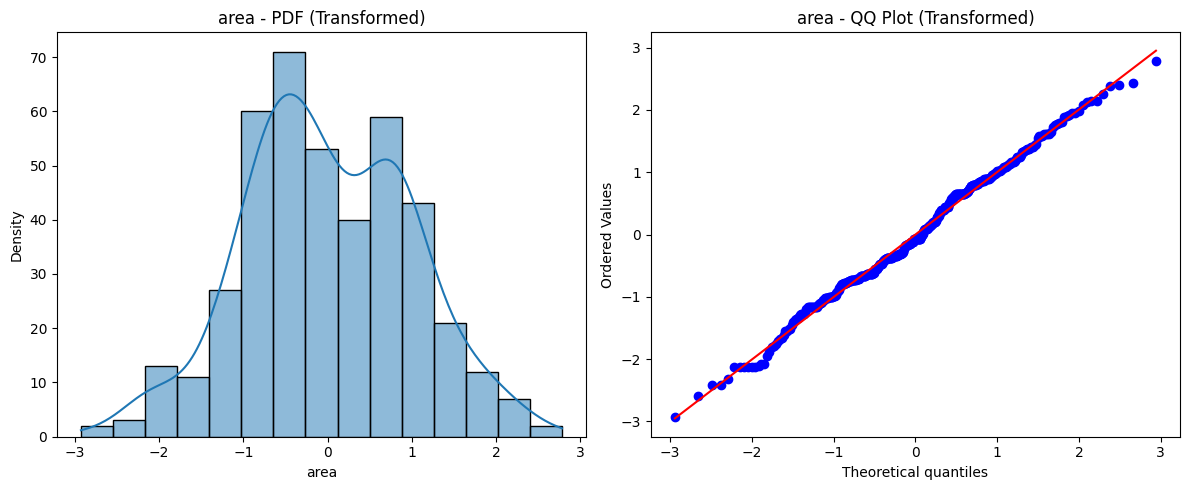

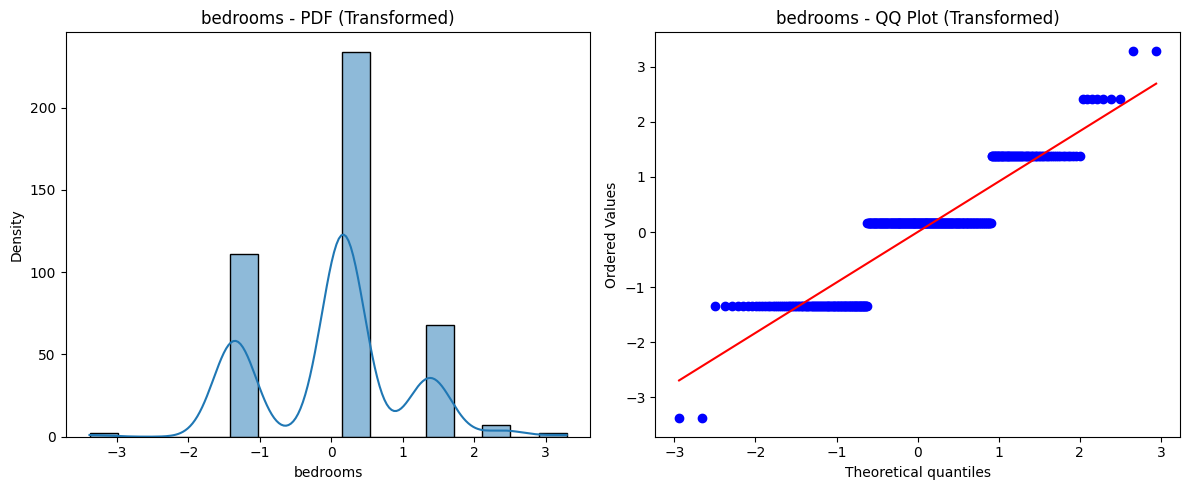

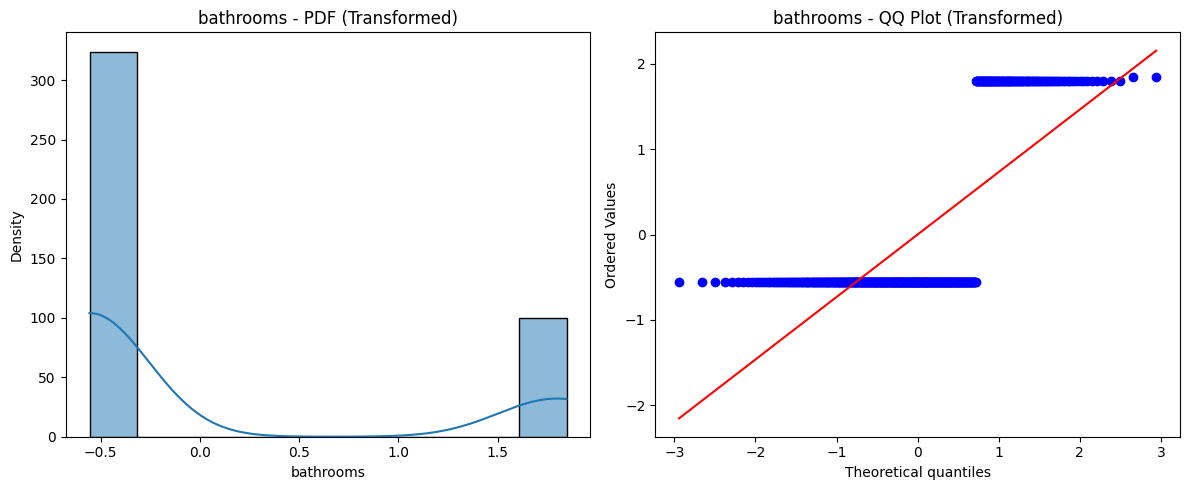

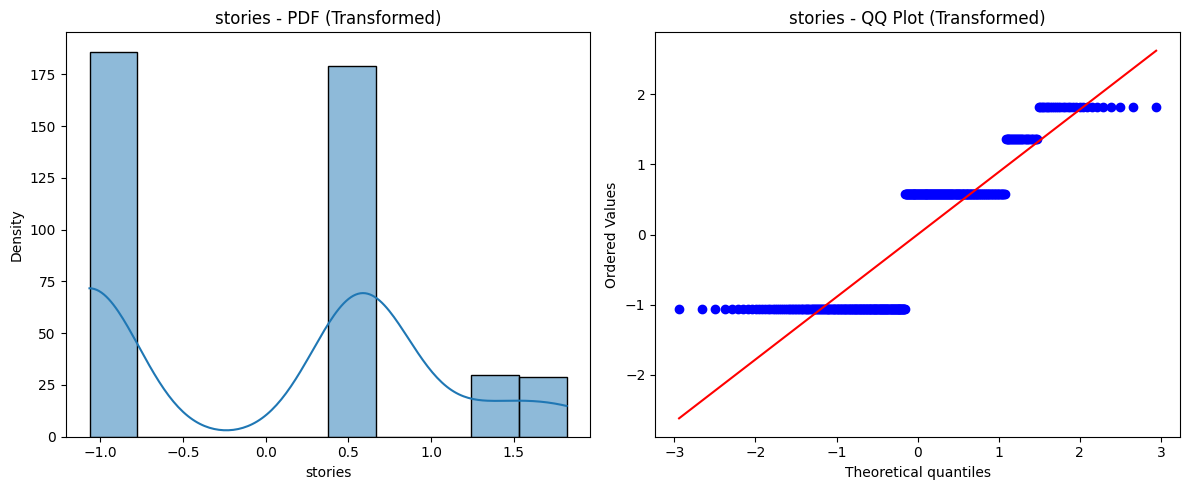

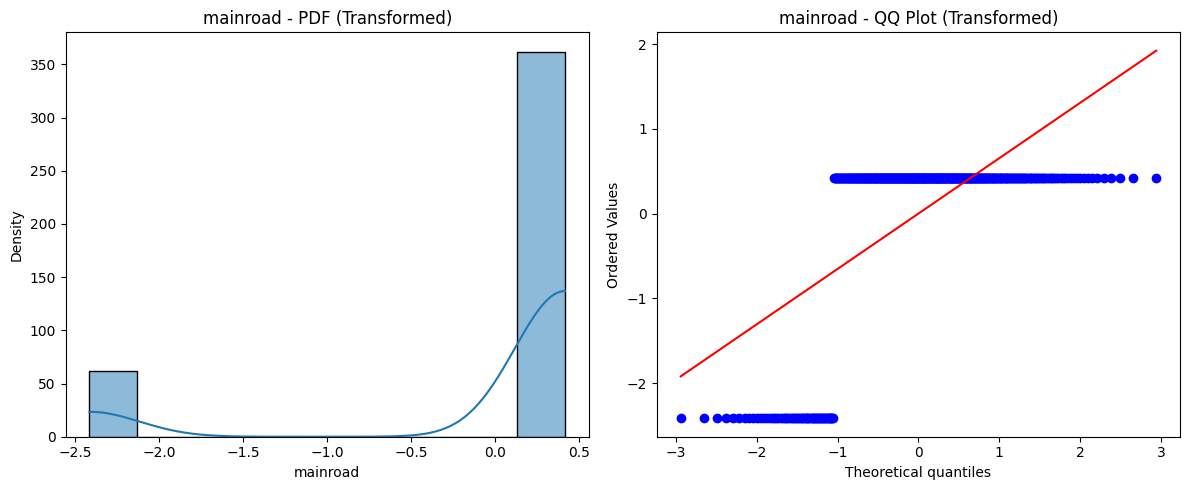

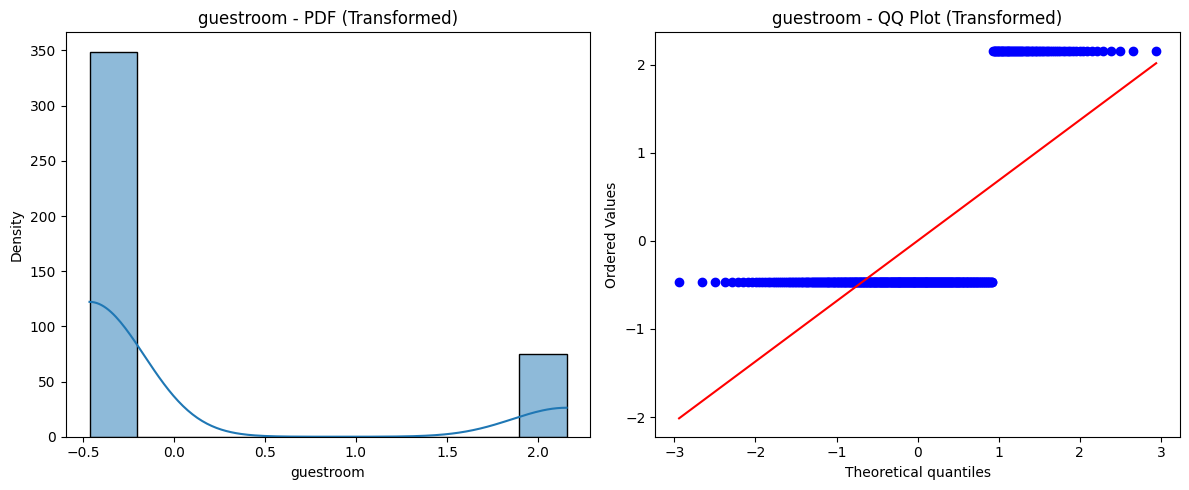

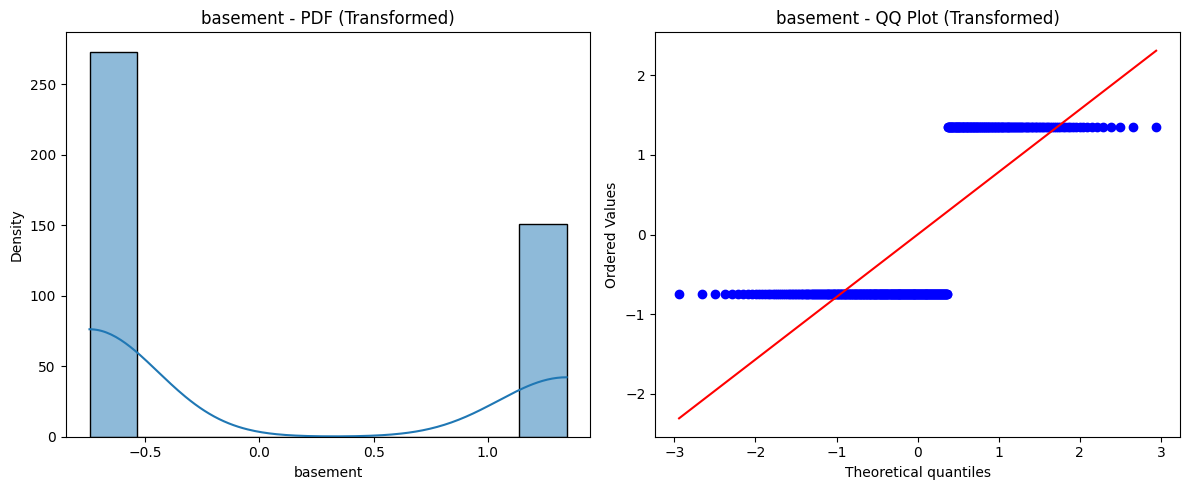

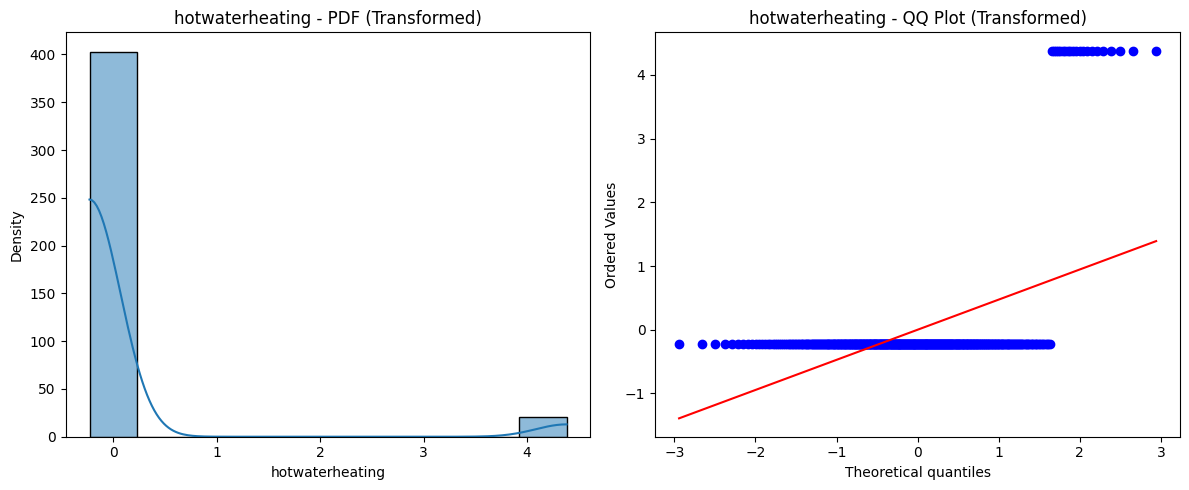

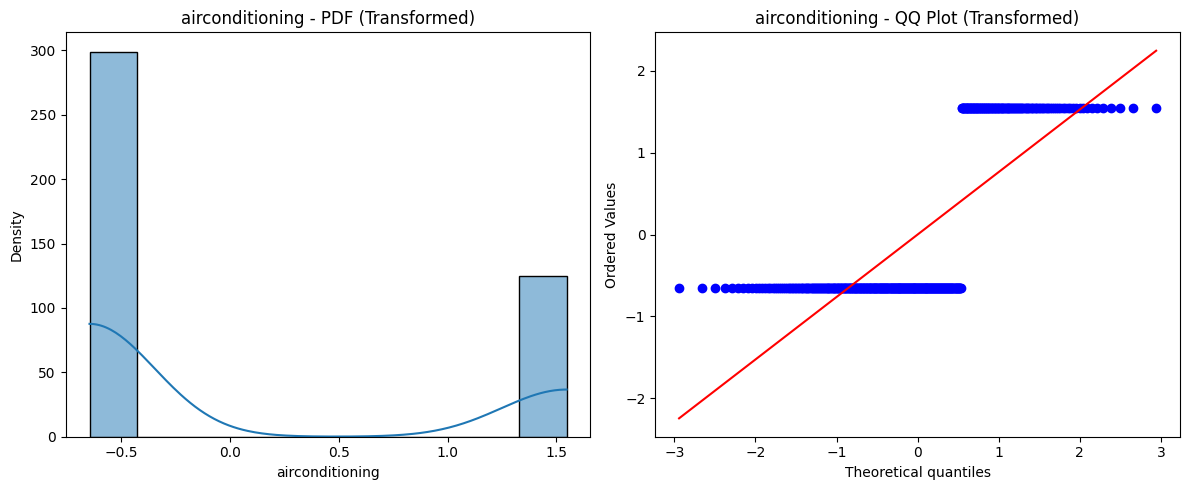

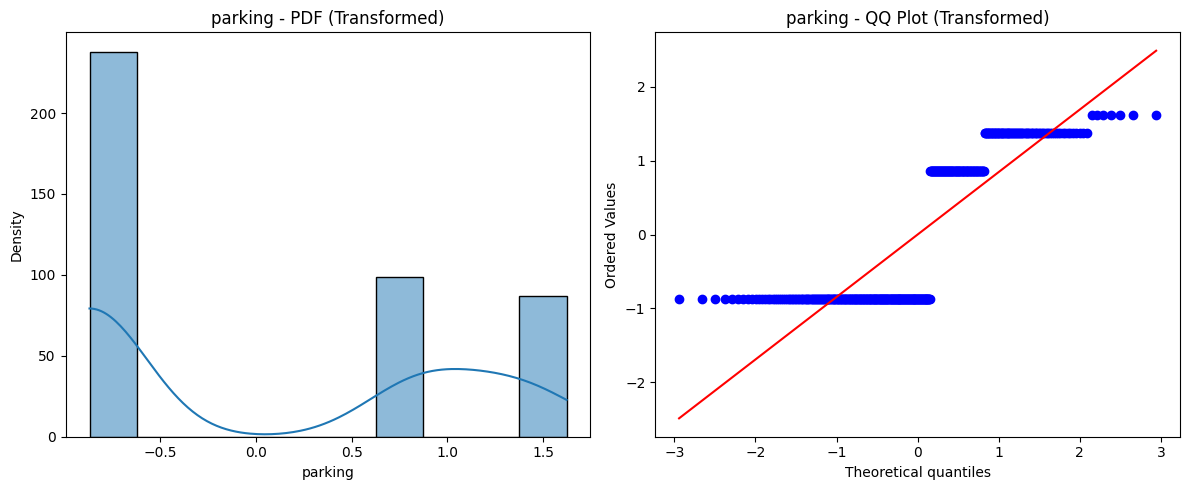

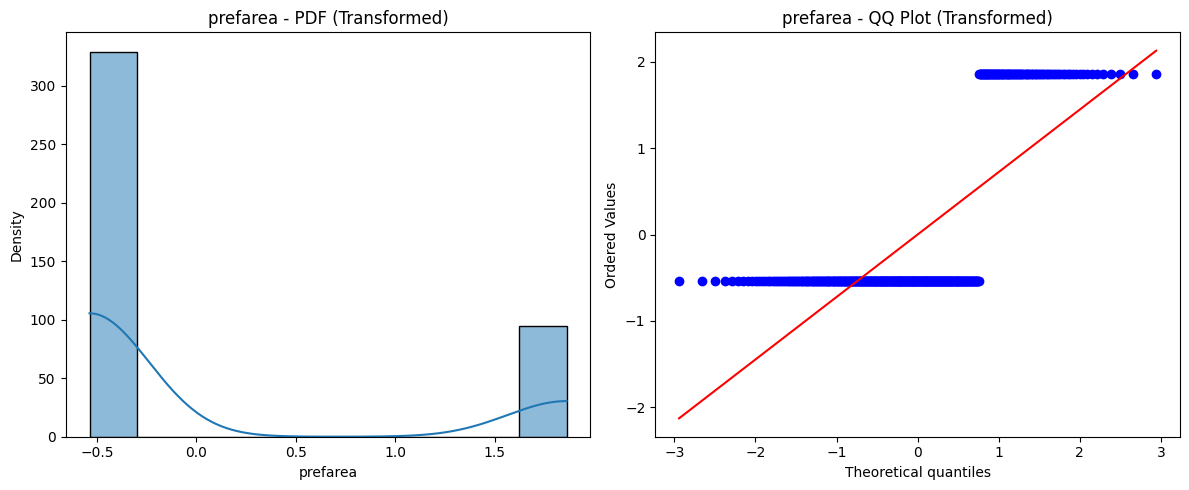

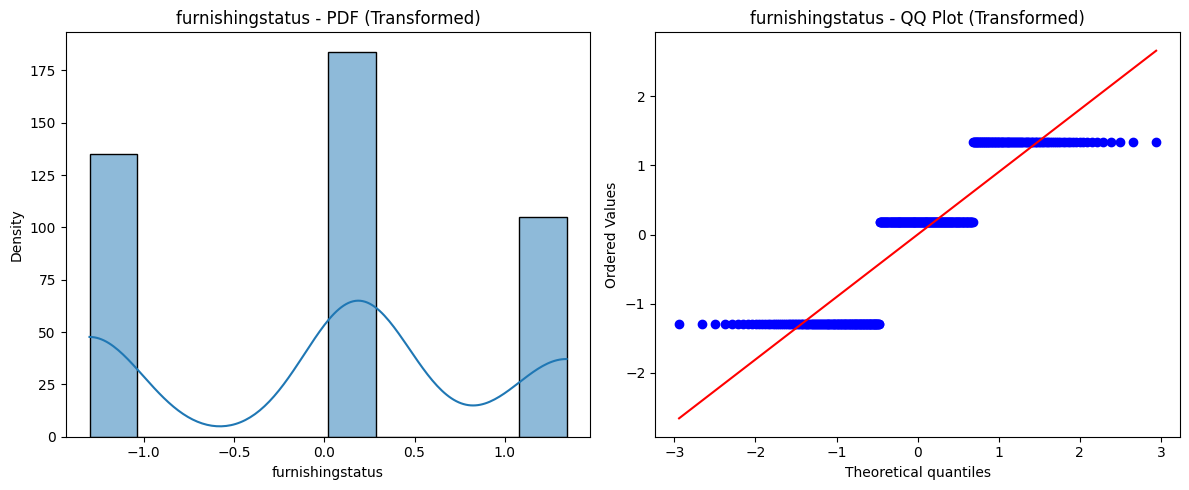

In [ ]:
for col in x_train_transformed_dataframe.columns:
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))  # 2 subplots: PDF and QQ plot

    # PDF with KDE
    sns.histplot(x_train_transformed_dataframe[col], kde=True, ax=ax1)
    ax1.set_title(f'{col} - PDF (Transformed)')
    ax1.set_xlabel(col)
    ax1.set_ylabel('Density')

    # QQ Plot
    stats.probplot(x_train_transformed_dataframe[col], dist="norm", plot=ax2)
    ax2.set_title(f'{col} - QQ Plot (Transformed)')

    plt.tight_layout()
    plt.show()


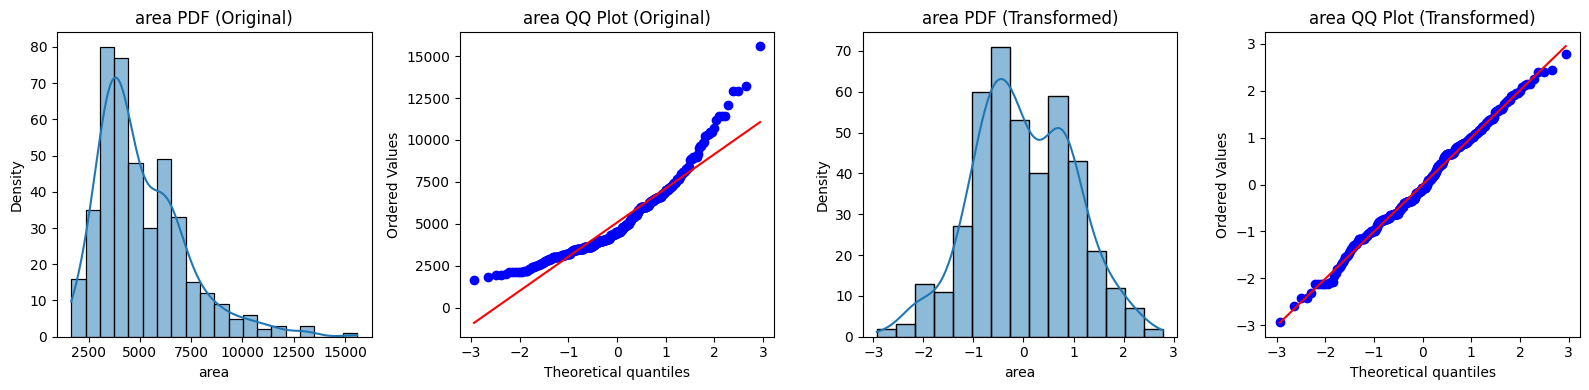

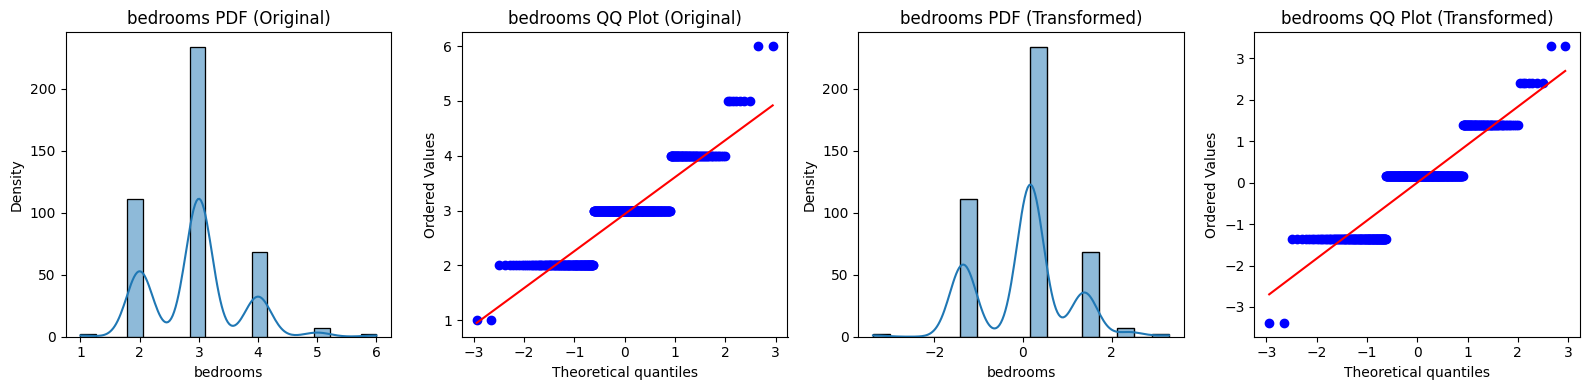

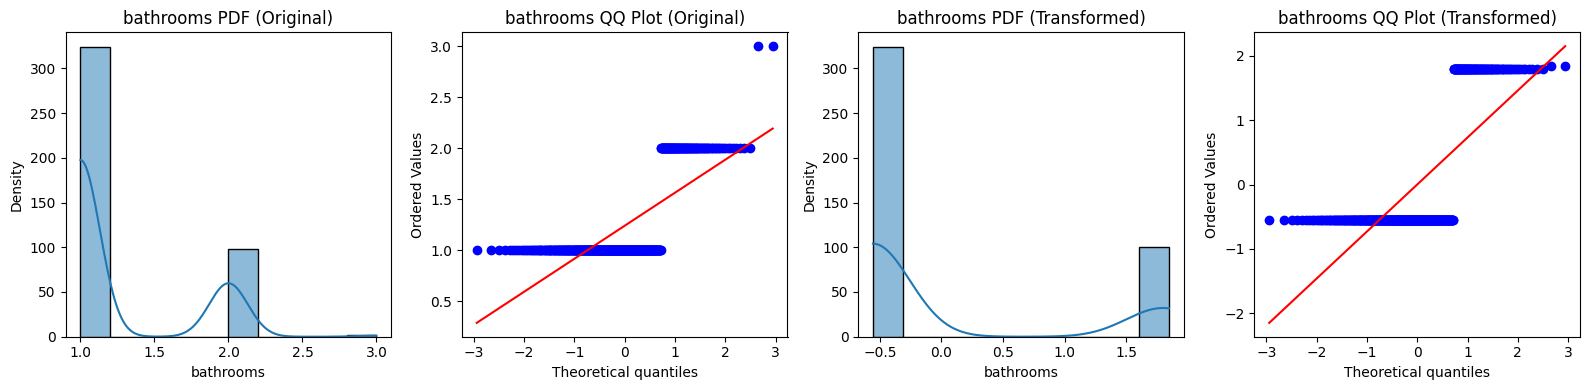

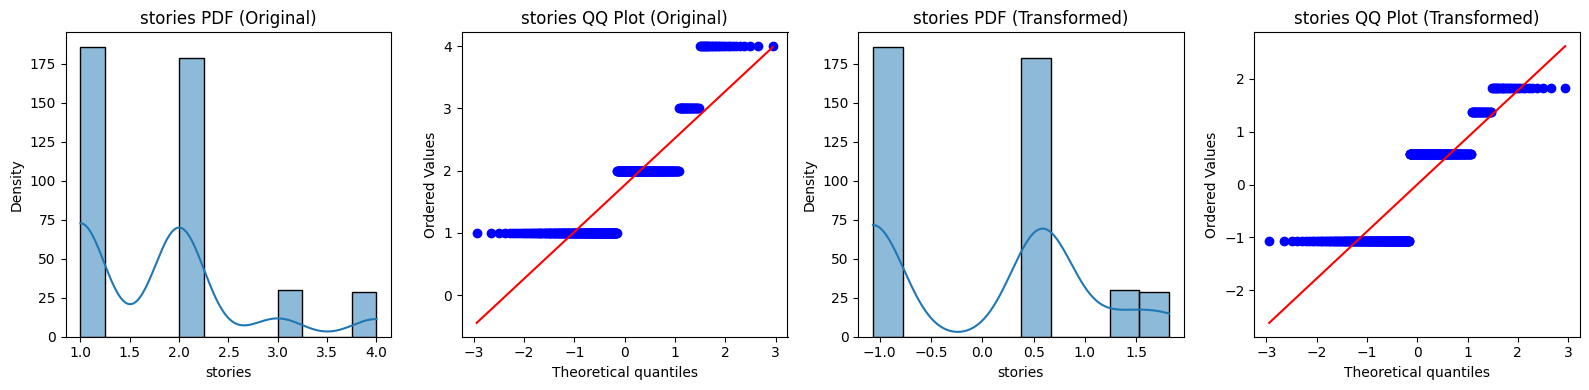

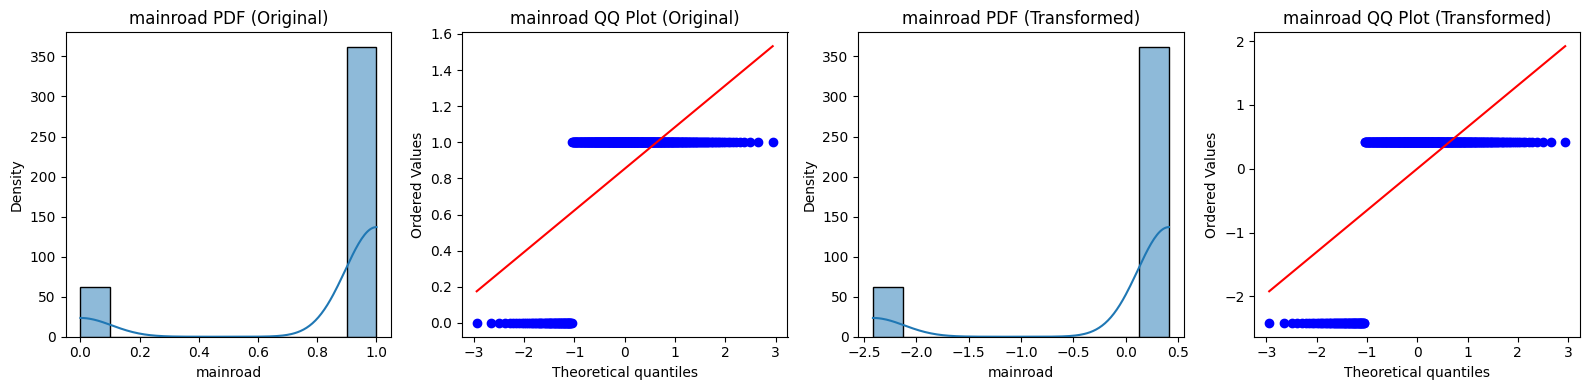

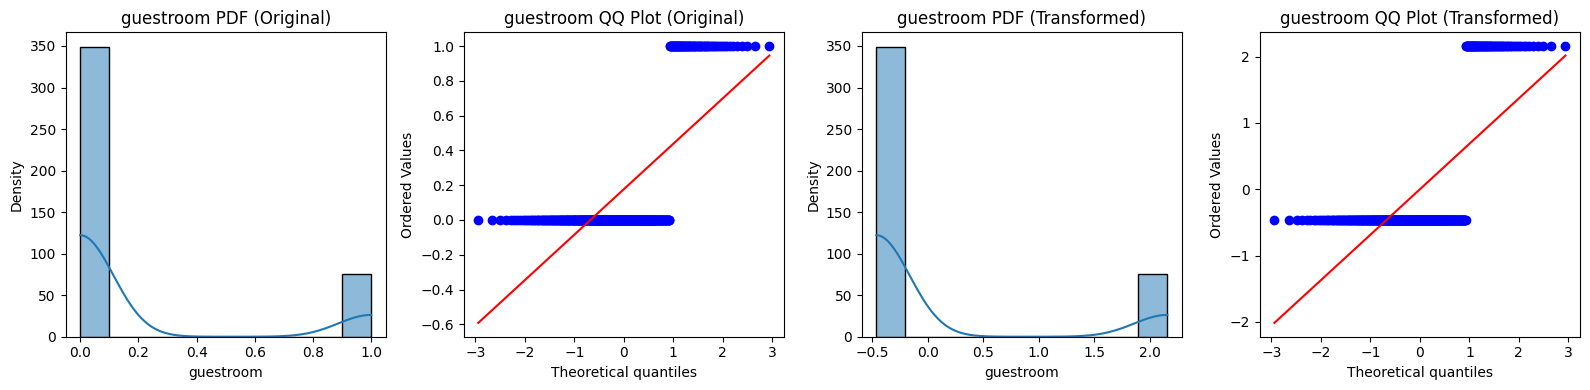

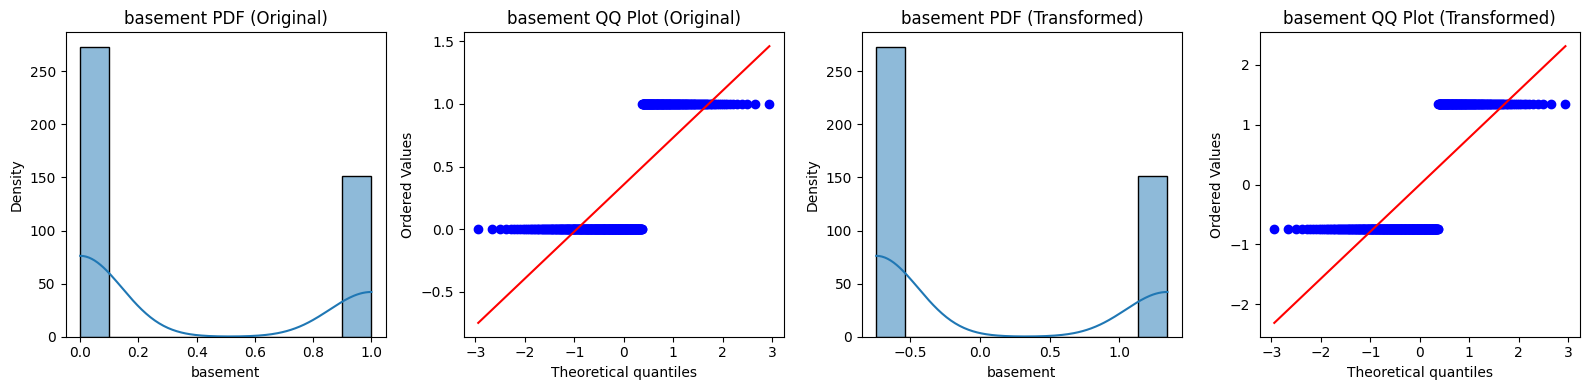

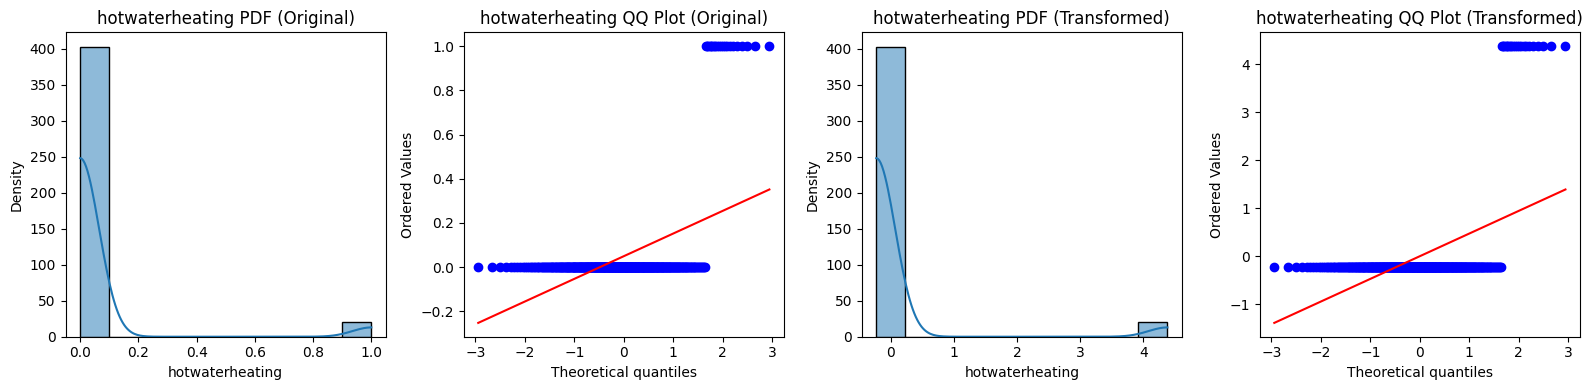

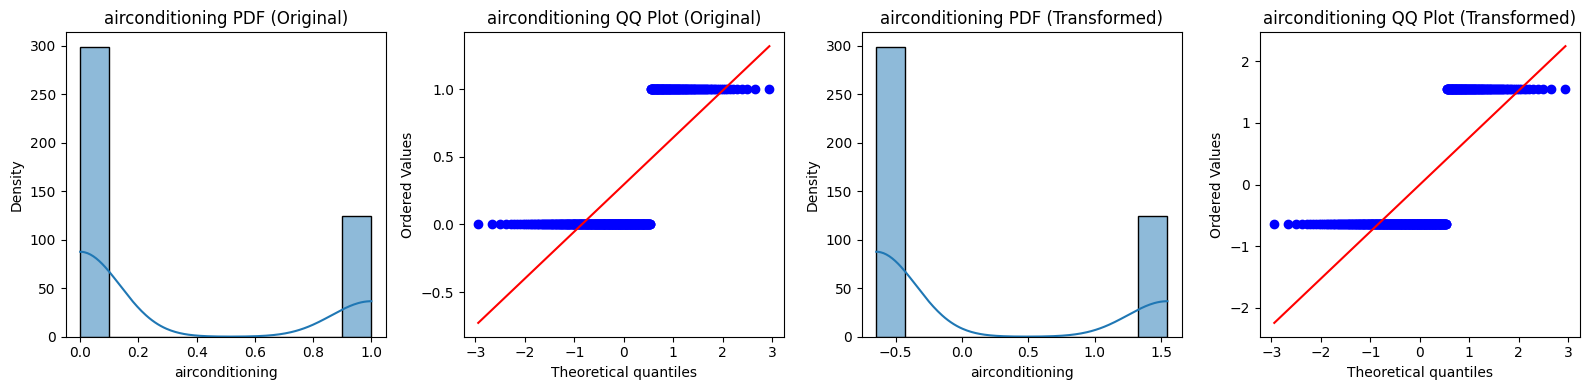

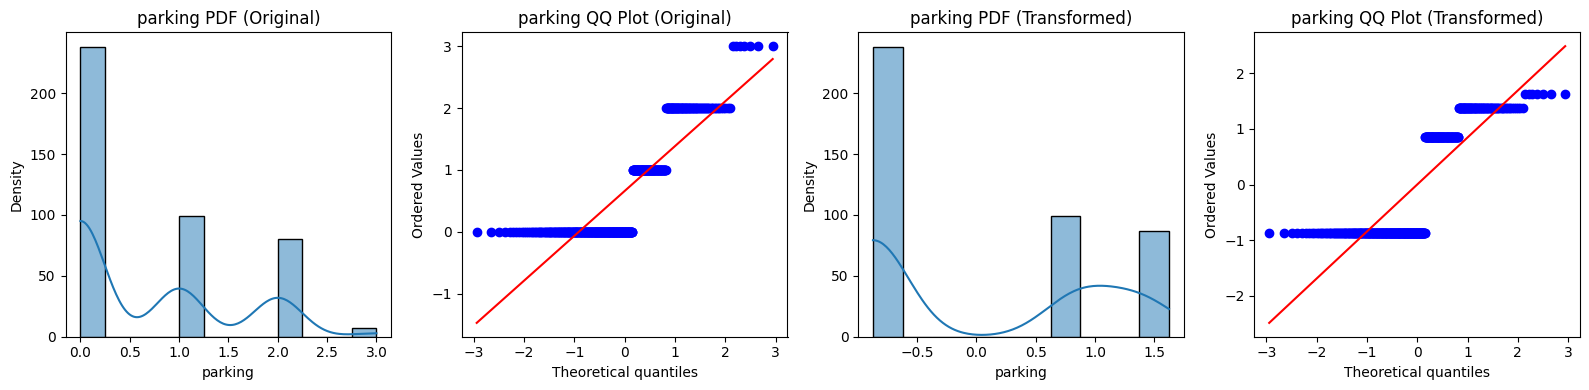

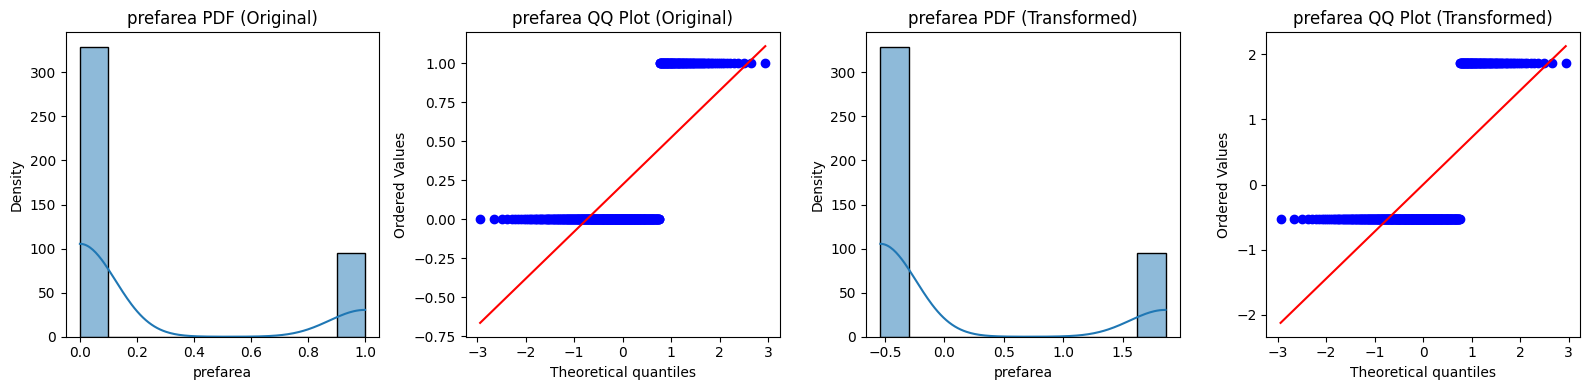

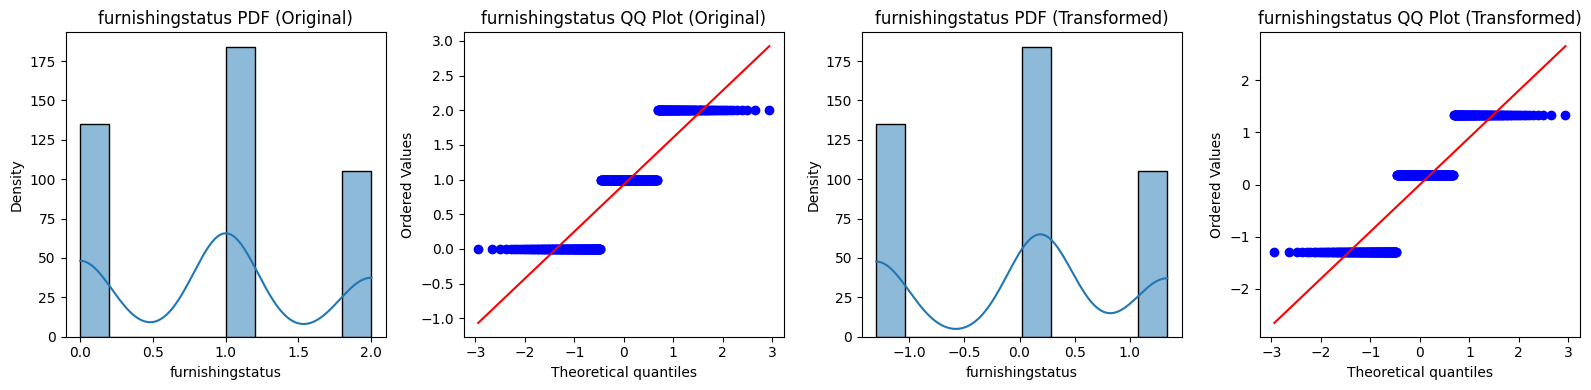

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import pandas as pd

# Assuming x_train is a DataFrame
# and x_train_transformed is a NumPy array, we convert it to DataFrame for easier plotting:
for col in x_train.columns:
    fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(16, 4))  # Wider for 4 plots

    # 1. Original PDF
    sns.histplot(x_train[col], kde=True, ax=ax1)
    ax1.set_title(f'{col} PDF (Original)')
    ax1.set_xlabel(col)
    ax1.set_ylabel('Density')

    # 2. Original QQ Plot
    stats.probplot(x_train[col], dist="norm", plot=ax2)
    ax2.set_title(f'{col} QQ Plot (Original)')

    # 3. Transformed PDF
    sns.histplot(x_train_transformed_dataframe[col], kde=True, ax=ax3)
    ax3.set_title(f'{col} PDF (Transformed)')
    ax3.set_xlabel(col)
    ax3.set_ylabel('Density')

    # 4. Transformed QQ Plot
    stats.probplot(x_train_transformed_dataframe[col], dist="norm", plot=ax4)
    ax4.set_title(f'{col} QQ Plot (Transformed)')

    plt.tight_layout()
    plt.show()

In [ ]:
# from sklearn.preprocessing import FunctionTransformer
# import numpy as np
# import pandas as pd

# # Correct: pass a 2D array (use double brackets or reshape)
# log_transform = FunctionTransformer(np.log1p)
# bath_transfo = log_transform.fit_transform(train_df[["bathrooms"]])  # ✅ 2D input

# # Convert to DataFrame
# bathroom_frame = pd.DataFrame(bath_transfo, columns=["bathroom"])


In [ ]:
# # import matplotlib.pyplot as plt
# # import seaborn as sns
# # import scipy.stats as stats

# # fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# # # Plot original 'bathrooms' data (before transformation)
# # sns.histplot(x_train["bathrooms"], kde=True, ax=ax1)
# # ax1.set_title("Original Bathrooms Histogram")
# # ax1.set_xlabel("Bathrooms")
# # ax1.set_ylabel("Density")

# # # Plot QQ plot of transformed data
# # stats.probplot(bathroom_frame["bathroom"], dist="norm", plot=ax2)
# # ax2.set_title("Log-Transformed Bathrooms QQ Plot")

# # plt.tight_layout()
# # plt.show()
# The values of bathroom are constant due this we it make all 0

In [ ]:
from sklearn.linear_model import LinearRegression

lr1 = LinearRegression()

lr1.fit(x_train_transformed_dataframe,y_train)

LinearRegression()

In [193]:
y_pred1 = lr1.predict(x_test)

In [194]:
print("MSE:", mean_squared_error(y_test, y_pred1))
print("R² Score:", r2_score(y_test,y_pred1))   # Accuracy of regression

MSE: 8.310706135551075e+18
R² Score: -1644195.3867326581


In [ ]:
print(x_train_transformed_dataframe.shape)
print(y_train.shape)


(424, 12)
(424,)
